## Data Retrieval

Yahoo Finance API is used to get stocks data for Google over period of seven years. 

In [1]:

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [1]:
import yahoo_finance as yahoo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames


# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 9)

###### Entry Parameters #######
startDate = '2004-08-19'
endDate = '2017-03-01'
queryDate='2017-02-07'
tickerSymbol = 'GOOG'
metric = 'Adj_Close'

#Used for re-running: stops querying the API if we already have the data
reloadData = True

#Stock Data- first step is to obtain the list of stocks, and then select a stock to run through machine learning
fileName = './data/GoogleData.csv'
###############################


def prepareData(data):
    #Date and Symbol columns not required
    data.drop(['Symbol'], axis = 1, inplace = True)
    pd.to_datetime(data['Date'])
    df = pd.DataFrame(data)
    df.sort_values(by='Date', ascending=True)
    # make date as an index for pandas data frame for visulizations
    df.set_index('Date',inplace=True)
    return df

    
# returive stock data using yahoo Finance API and return a dataFrame
def retrieveStockData(tickerSymbol, startDate, endDate, fileName):
    try:
        if reloadData:
            print('Retriving data for ticker _' + tickerSymbol + '...')
            historical = yahoo.Share(tickerSymbol).get_historical(startDate, endDate)
            
            data = pd.DataFrame(historical)
            # save as CSV to stop blowing up their API
            data.to_csv(fileName, index=False)
            data = prepareData(data)
        else:
            # read the existing csv 
            data = pd.read_csv(fileName)
            data = prepareData(data)
            
        print('Wholesale customers dataset has {} samples with {} features each.'.format(*data.shape))
        return data
    except:
         print('Dataset could not be loaded. Is the dataset missing?')
        

GOOGdata = retrieveStockData('GOOG', '2004-08-19', '2017-03-01', './data/GoogleData.csv')
display(GOOGdata.head())
display(GOOGdata.tail())

Populating the interactive namespace from numpy and matplotlib
Retriving data for ticker _GOOG...
Wholesale customers dataset has 3155 samples with 6 features each.


,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-03-01,835.23999,835.23999,836.255005,827.26001,828.849976,1491400
2017-02-28,823.210022,823.210022,828.539978,820.200012,825.609985,2252300
2017-02-27,829.280029,829.280029,830.50,824.00,824.549988,1099500
2017-02-24,828.640015,828.640015,829.00,824.200012,827.72998,1386600
2017-02-23,831.330017,831.330017,832.460022,822.880005,830.119995,1470100


,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,
2004-08-25,52.947145,106.000184,108.000187,103.88018,104.960181,9232100
2004-08-24,52.382705,104.870176,111.600192,103.570177,111.240189,15319700
2004-08-23,54.645447,109.400185,113.480193,109.050183,110.750191,18342800
2004-08-20,54.10099,108.310183,109.080187,100.500174,101.010175,22942800
2004-08-19,50.119968,100.340176,104.060182,95.960165,100.000168,44871300


In [ ]:
import yahoo_finance as yahoo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames


# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 9)

###### Entry Parameters #######
startDate = '2004-08-19'
endDate = '2017-03-01'
queryDate='2017-02-07'
tickerSymbol = 'MSFT'
metric = 'Adj_Close'

#Used for re-running: stops querying the API if we already have the data
reloadData = False

#Stock Data- first step is to obtain the list of stocks, and then select a stock to run through machine learning
fileName = './data/MicrosoftData.csv'
###############################


def prepareData(data):
    #Date and Symbol columns not required
    data.drop(['Symbol'], axis = 1, inplace = True)
    pd.to_datetime(data['Date'])
    df = pd.DataFrame(data)
    df.sort_values(by='Date', ascending=True)
    # make date as an index for pandas data frame for visulizations
    df.set_index('Date',inplace=True)
    return df

    
# returive stock data using yahoo Finance API and return a dataFrame
def retrieveStockData():
    try:
        if reloadData:
            print('Retriving data for ticker _GOOG...')
            historical = yahoo.Share(tickerSymbol).get_historical(startDate, endDate)
            
            data = pd.DataFrame(historical)
            # save as CSV to stop blowing up their API
            data.to_csv(fileName, index=False)
            data = prepareData(data)
        else:
            # read the existing csv 
            data = pd.read_csv(fileName)
            data = prepareData(data)
            
        print('Wholesale customers dataset has {} samples with {} features each.'.format(*data.shape))
        return data
    except:
         print('Dataset could not be loaded. Is the dataset missing?')
        


In [2]:
data = GOOGdata = retrieveStockData('GOOG', '2004-08-19', '2017-03-01', './data/GoogleData.csv')
display(GOOGdata.head())
display(GOOGdata.tail())

Retriving data for ticker _GOOG...
Wholesale customers dataset has 3155 samples with 6 features each.


,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-03-01,835.23999,835.23999,836.255005,827.26001,828.849976,1491400
2017-02-28,823.210022,823.210022,828.539978,820.200012,825.609985,2252300
2017-02-27,829.280029,829.280029,830.50,824.00,824.549988,1099500
2017-02-24,828.640015,828.640015,829.00,824.200012,827.72998,1386600
2017-02-23,831.330017,831.330017,832.460022,822.880005,830.119995,1470100


,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,
2004-08-25,52.947145,106.000184,108.000187,103.88018,104.960181,9232100
2004-08-24,52.382705,104.870176,111.600192,103.570177,111.240189,15319700
2004-08-23,54.645447,109.400185,113.480193,109.050183,110.750191,18342800
2004-08-20,54.10099,108.310183,109.080187,100.500174,101.010175,22942800
2004-08-19,50.119968,100.340176,104.060182,95.960165,100.000168,44871300


In [3]:
MSFTdata = retrieveStockData('MSFT', '1986-03-13', '2017-03-01', './data/MicrosoftData.csv')
display(MSFTdata.head())
display(MSFTdata.tail())

Retriving data for ticker _MSFT...
Wholesale customers dataset has 7807 samples with 6 features each.


,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-03-01,64.940002,64.940002,64.989998,64.019997,64.129997,26763800
2017-02-28,63.98,63.98,64.199997,63.759998,64.080002,23043900
2017-02-27,64.230003,64.230003,64.540001,64.050003,64.540001,15850400
2017-02-24,64.620003,64.620003,64.800003,64.139999,64.529999,21705200
2017-02-23,64.620003,64.620003,64.730003,64.190002,64.419998,20235200


,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,
1986-03-19,0.066202,28.25,29.000001,28.00,28.75,47894400
1986-03-18,0.067374,28.75,29.75,28.500001,29.499999,67766400
1986-03-17,0.069131,29.499999,29.75,29.000001,29.000001,133171200
1986-03-14,0.06796,29.000001,29.499999,28.00,28.00,308160000
1986-03-13,0.065616,28.00,29.25,25.499999,25.499999,1031788800


## Data Exploration

Let’s briefly describe data features. 

- **Open** is the price of the stock at the beginning of the trading day (it need not be the closing price of the previous trading day), 
- **high** is the highest price of the stock on that trading day, 
- **low** the lowest price of the stock on that trading day, and 
- **close** the price of the stock at closing time. 
- **Volume** indicates how many stocks were traded. 
- **Adjusted close** is the closing price of the stock that adjusts the price of the stock for corporate actions. While stock prices are considered to be set mostly by traders, stock splits (when the company makes each extant stock worth two and halves the price) and dividends (payout of company profits per share) also affect the price of a stock and should be accounted for.

In this section I will explore the data through visualizations and code to understand how each feature is related to the others. I will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.


In [20]:
# Display a description of the dataset
display(data.describe())

,Adj_Close,Close,High,Low,Open,Volume
count,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3.155000e+03
mean,354.689993,557.897728,563.368049,552.358738,558.133157,8.343589e+06
std,193.606313,197.939628,198.609157,197.166387,198.018682,8.450934e+06
min,49.955130,100.010169,101.740174,95.960165,99.190173,7.900000e+03
25%,222.325557,445.095766,452.440787,440.285757,446.020776,3.083000e+06
50%,289.231278,543.872489,549.502492,539.000928,544.800917,5.571900e+06
75%,520.656178,661.919983,669.361148,654.230011,661.260563,1.108260e+07
max,835.669983,1220.172036,1228.882066,1218.602083,1226.802152,8.254150e+07


The first thing I notice here is that the mean values and median values differ a lot. 
That means the distribution should not be a normal distribution. In such a case, median is considered to be more reiable than mean.

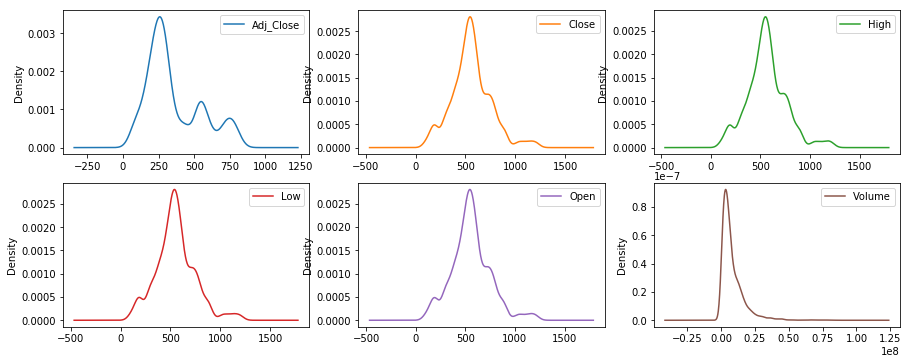

In [21]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

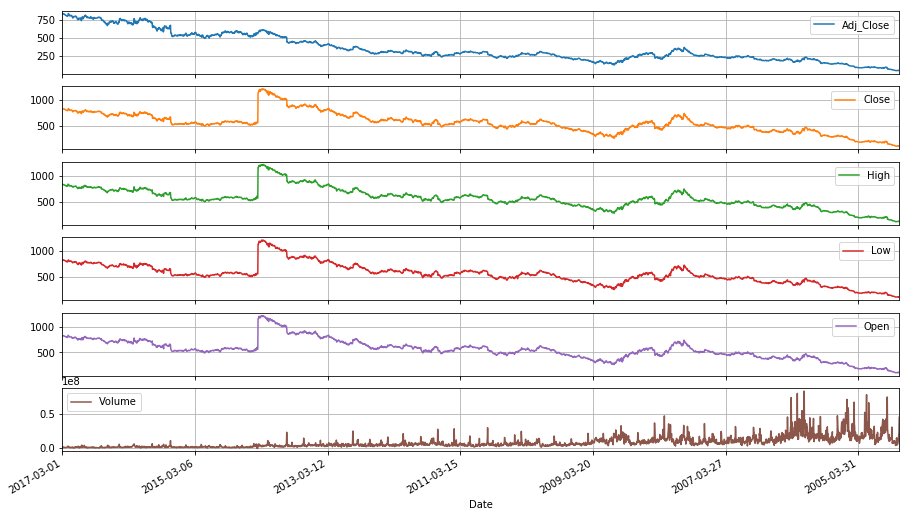

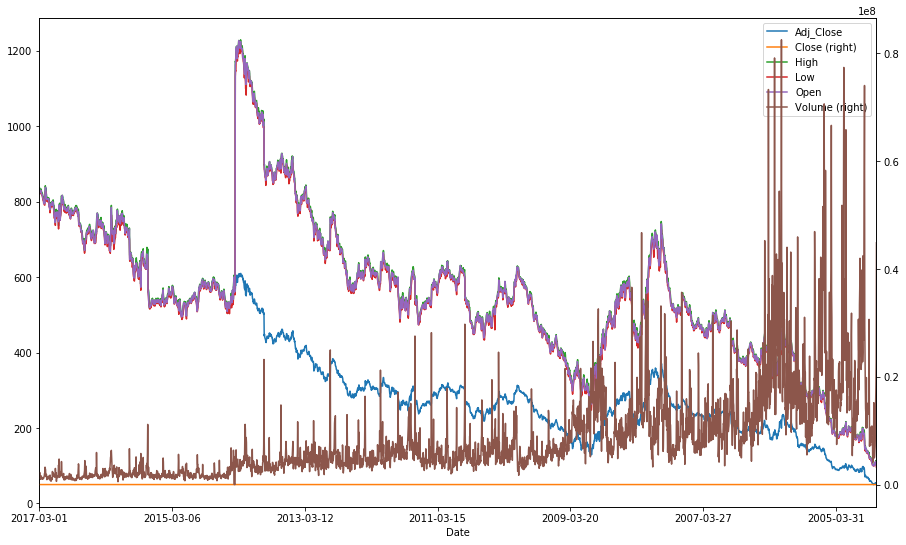

In [22]:
data.plot(grid = True, subplots=True)
plt.legend(loc='best')

data.plot(secondary_y=['Close', 'Volume'])

We can observe the price changes of Google stock in seven years. We see in general the price of Google stocks has been increased. We can observe some drops and spikes in visualization also. Mostly in 2013 and 2015.

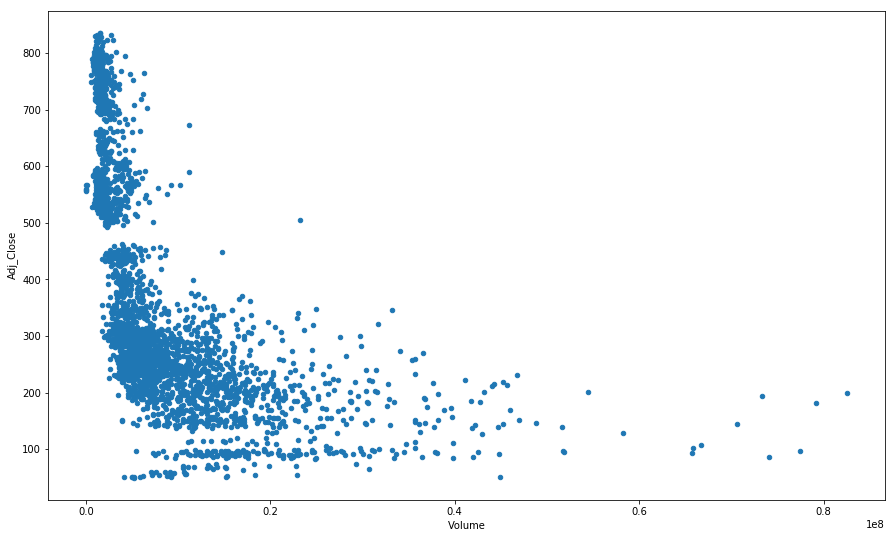

In [23]:
data.plot.scatter(x='Volume', y='Adj_Close')
plt.show()

### Implementation: Selecting Samples

To get a better understanding of stock data and how this data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add three indices to the indices list which will represent the stocks to track. 
It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [24]:
# drop date index to be able to work with data better
data = data.reset_index(drop = True)

# Select three indices to sample from the dataset
indices = [509, 1200, 60]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)

print('Chosen samples of Google stock dataset:')
display(samples)

Chosen samples of Google stock dataset:


,Adj_Close,Close,High,Low,Open,Volume
0,531.912381,531.912381,536.441404,529.412422,536.052398,1457800
1,300.100412,600.801024,613.811055,596.001048,613.441081,6126600
2,747.919983,747.919983,759.849976,737.025024,757.440002,2996900


### Calculating percentile change

In [25]:
#whats of interest here is the percentage change from one day to the next
#data.drop(['Date'], axis = 1, inplace = True)

data = data.pct_change()

data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
    
display(data.head())

,Adj_Close,Close,High,Low,Open,Volume
0,-0.014403,-0.014403,-0.009226,-0.008534,-0.003909,0.510192
1,-0.014403,-0.014403,-0.009226,-0.008534,-0.003909,0.510192
2,0.007374,0.007374,0.002366,0.004633,-0.001284,-0.511832
3,-0.000772,-0.000772,-0.001806,0.000243,0.003857,0.261119
4,0.003246,0.003246,0.004174,-0.001602,0.002887,0.060219


## Feature Relevance 

In [26]:
for col in list(data.columns.values):    
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(col, axis=1)

    # Split the data into training and testing sets using the given feature as the target
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[col], test_size=0.25, random_state=42)

    # Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print("{} R^2 score: {:2f}".format(col ,score))

Adj_Close R^2 score: 0.993629
Close R^2 score: 0.992827
High R^2 score: 0.730364
Low R^2 score: 0.570127
Open R^2 score: 0.576667
Volume R^2 score: -0.475214


/Users/nazanindelam/miniconda3/envs/naz/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The coefficient of determination, R^2, is scored between 0 and 1, with 1 being a perfect fit. A negative R^2 implies the model fails to fit the data. 

Based on the R^2 score looks like between Open, Close and Adjacent Close prices; Close has the highest relevancy and it is best to use this to determine prediction.
Volume has the lowest score which makes it not being much useful for our predictions since the model couldn't fit trying to predict them using the others.

### Visualize Feature Distributions

To get a better understanding of the dataset, we can construct a scatter matrix of each of the six stock features present in the data. 
If we found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if we believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data.

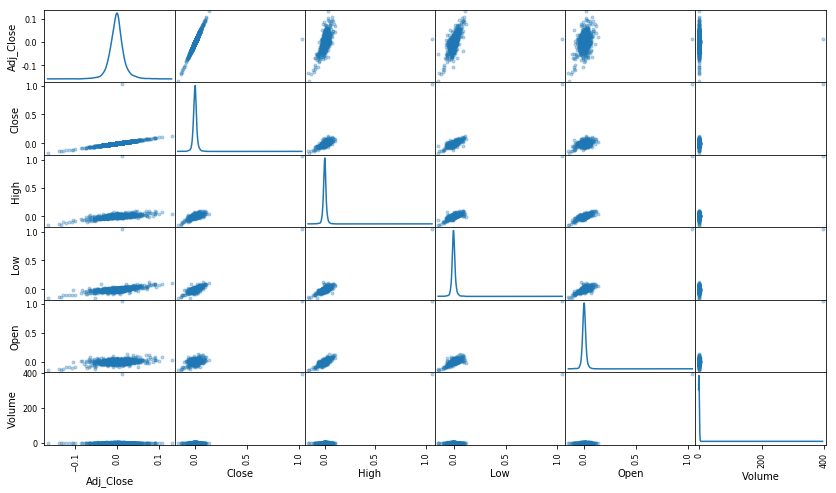

In [27]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Identifying outliers
Outliers are data points that are distinctvely separated from other data points any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile.

Outliers has the biggest effect on the mean but not much effect on the median. Effecting mean can lead to effecting variance and then having largest effect on standard deviation.

In [28]:
#locate number of outliers for each column, outlier being 1.5 IQR up or down from upper or lower quartile
outliers = pd.DataFrame(index=data.index)
outliers = pd.DataFrame(np.where(
        (data > 1.5 * ((data.quantile(0.75) - data.quantile(0.25)) + data.quantile(0.75))) |
        (data < 1.5 * (data.quantile(0.25) - (data.quantile(0.75)) - data.quantile(0.25))),1, 0), 
                        columns=data.columns)

#transpose the describe so that columns can be added
res = data.describe().transpose()

display(res)

,count,mean,std,min,25%,50%,75%,max
Adj_Close,3155.0,-0.000706,0.019415,-0.166608,-0.010036,-0.000488,0.008066,0.131339
Close,3155.0,-0.000385,0.026676,-0.166608,-0.010036,-0.000488,0.008066,1.026943
High,3155.0,-0.000408,0.025487,-0.166731,-0.008253,-0.000413,0.006541,1.062617
Low,3155.0,-0.000409,0.026242,-0.149113,-0.009408,-0.001279,0.007141,1.046402
Open,3155.0,-0.000371,0.027128,-0.153278,-0.010153,-0.000667,0.008338,1.045787
Volume,3155.0,0.191678,7.031132,-0.971152,-0.189872,0.015686,0.248742,394.358779


In [29]:
res['variance'] = data.var()
res['outliers'] = outliers.sum()
res['mean_x_outliers'] = (1/res['outliers'])*res['mean']


display(res['variance'])
display(res['outliers'])
display(res['mean_x_outliers'])
display(res)

Adj_Close     0.000377
Close         0.000712
High          0.000650
Low           0.000689
Open          0.000736
Volume       49.436818
Name: variance, dtype: float64

Adj_Close    731
Close        732
High         761
Low          771
Open         711
Volume       376
Name: outliers, dtype: int64

Adj_Close   -9.660138e-07
Close       -5.254209e-07
High        -5.364458e-07
Low         -5.306985e-07
Open        -5.216544e-07
Volume       5.097810e-04
Name: mean_x_outliers, dtype: float64

,count,mean,std,min,25%,50%,75%,max,variance,outliers,mean_x_outliers
Adj_Close,3155.0,-0.000706,0.019415,-0.166608,-0.010036,-0.000488,0.008066,0.131339,0.000377,731,-9.660138e-07
Close,3155.0,-0.000385,0.026676,-0.166608,-0.010036,-0.000488,0.008066,1.026943,0.000712,732,-5.254209e-07
High,3155.0,-0.000408,0.025487,-0.166731,-0.008253,-0.000413,0.006541,1.062617,0.000650,761,-5.364458e-07
Low,3155.0,-0.000409,0.026242,-0.149113,-0.009408,-0.001279,0.007141,1.046402,0.000689,771,-5.306985e-07
Open,3155.0,-0.000371,0.027128,-0.153278,-0.010153,-0.000667,0.008338,1.045787,0.000736,711,-5.216544e-07
Volume,3155.0,0.191678,7.031132,-0.971152,-0.189872,0.015686,0.248742,394.358779,49.436818,376,5.097810e-04


## Back Test

In [30]:
#backtest - query the data, and then query the API to see how close it was to the correct value
fileName = "data/backTest.csv"
if reloadData:
    data = pd.DataFrame(yahoo.Share(ticker).get_historical(startDate, endDate))
    # save as CSV to stop blowing up their API
    data.to_csv(fileName, index=False)
    # save then reload as the qandl date doesn't load right in Pandas
    data = pd.read_csv(fileName)
else:
    data = pd.read_csv(fileName)

#fetch the actual price so that we can compare with what was predicted
actual = data[metric][data['Date'] == queryDate].values[0]
print("Actual price at date of query", actual)
#the endDatePrice is the price at the end of the data - used for comparison
endDatePrice = data[metric][data['Date'] == endDate].values[0]

Actual price at date of query 806.969971


## Define worthiness of a trade
Below is a function which determines variance of a trade means how much a trade worth. Which is risk vs reward or in another words, difference in expected return vs actual return on an investment.

In [31]:
def varianceOfReturn(endPrice, actualPrice, predictedPrice):
    t1 = abs(actualPrice - endPrice)
    p1 = abs(predictedPrice - actualPrice)
    return (p1/t1)*100.0


## Build an Stock Predictor

In [56]:
from keras.layers import Dense, LSTM, Activation, Dropout, Flatten
from keras.models import Sequential

from sklearn import svm, metrics, preprocessing
import datetime as dt
import pandas as pd
import numpy as np
import yahoo_finance as yahoo
from sklearn.cross_validation import train_test_split, ShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Show matplotlib plots inline (nicely formatted in the notebook)
import matplotlib.pyplot as plt

def xrange(x):
    return iter(range(x))

class StockPredictor:

    def __init__(self):
        self.tickerSymbol = ''

    #LoadData call queries the API, caching if necessary
    def loadData(self, tickerSymbol, startDate, endDate, reloadData=False, fileName='stockData.csv'):

        self.tickerSymbol = tickerSymbol
        self.startDate = startDate
        self.endDate = endDate

        if reloadData:
            #get data from yahoo finance fo tickerSymbol
            data = pd.DataFrame(yahoo.Share(tickerSymbol).get_historical(startDate, endDate))

            # save as CSV to stop blowing up their API
            data.to_csv(fileName)

            # save then reload as the yahoo finance date doesn't load right in Pandas
            data = pd.read_csv(fileName)
        else:
            data = pd.read_csv(fileName)

        # Due to differing markets and timezones, public holidays etc (e.g. BHP being an Australian stock,
        # ASX doesn't open on 26th Jan due to National Holiday) there are some gaps in the data.
        # from manual inspection and knowledge of the dataset, its safe to take the previous days' value
        data.fillna(method='ffill', inplace=True)
        self.data = data

    def setData(self, data, tickerSymbol, startDate, endDate):
        self.tickerSymbol = tickerSymbol
        self.startDate = startDate
        self.endDate = endDate
        self.data = data

    #preparedata call does the preprocessing of the loaded data
    #sequence length is a tuning parameter - this is the length of the sequence that will be trained on.
    # Too long and too short and the algorithms won't be able to find any trend - set as 5 days
    # by default, and this works pretty well
    def prepareData(self, predictDate, metric = 'Adj_Close', sequenceLength=5):

        # number of days to predict ahead
        predictDate = dt.datetime.strptime(predictDate, "%Y-%m-%d")
        endDate = dt.datetime.strptime(self.endDate, "%Y-%m-%d")

        #this pandas gets the number of business days ahead, within reason ( i.e. doesn't know about local market
        #public holidays, etc)
        self.numBdaysAhead = abs(np.busday_count(predictDate, endDate))
        print ("business days ahead", self.numBdaysAhead)

        self.sequenceLength = sequenceLength
        self.predictAhead = self.numBdaysAhead
        self.metric = metric

        data = self.data
        # Calculate date delta
        data['Date'] = pd.to_datetime(data['Date'])
        data['date_delta'] = (data['Date'] - data['Date'].min()) / np.timedelta64(1, 'D')

        #create the lagged dataframe
        tslag = pd.DataFrame(index=data.index)

        #use the shift function to get the price x days ahead, and then transpose
        for i in range(0, sequenceLength + self.numBdaysAhead):
            tslag["Lag%s" % str(i + 1)] = data[metric].shift(1 - i)

        #shift (-2) then corrects the sequence indexes
        tslag.shift(-2)
        tslag['date_delta'] = data['date_delta']

        # create the dataset.  This will take the first [sequenceLength] columns as the data, and the
        # value at end of sequence + number days ahead as the label
        trainCols = ['date_delta']
        for i in range(0, sequenceLength):
            trainCols.append("Lag%s" % str(i + 1))
        labelCol = 'Lag' + str(sequenceLength + self.numBdaysAhead)

        # get the final row for predictions
        rowcalcs = tslag[trainCols]
        rowcalcs = rowcalcs.dropna()

        #need an unscaled version for the RNN
        self.final_row_unscaled = rowcalcs.tail(1)


        #due to the way the lagged set is created, there will be some rows with nulls for where
        #the staggering has not worked to to predicting too far back, or ahead.
        #  We can drop these without losing any information as these sequences will be represented in
        #other rows within the dataset
        tslag.dropna(inplace=True)

        label = tslag[labelCol]
        new_data = tslag[trainCols]

        # print ("NEW DATA", new_data.tail(1))
        #scale the data for the Linear Regression, SVR and Neural Net
        self.scaler = preprocessing.StandardScaler().fit(new_data)
        scaled_data = pd.DataFrame(self.scaler.transform(new_data))

        # print ("SCALED DATA", scaled_data.tail(1))
        self.scaled_data = scaled_data
        self.label = label
        
    #Linear Regression trainer
    def trainLinearRegression(self):
        lr = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(self.scaled_data, self.label, test_size=0.25,
                                                            random_state=42)

        parameters = {'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}

        grid = GridSearchCV(lr, parameters, cv=None)
        grid.fit(X_train, y_train)
        predicttrain = grid.predict(X_train)
        predicttest = grid.predict(X_test)
        print ("R2 score for training set (Linear Regressor): {:.4f}.".format(r2_score(predicttrain, y_train)))
        print ("R2 score for test set (Linear Regressor): {:.4f}.".format(r2_score(predicttest, y_test)))
        self.model = grid

    #predict Linear Regression
    def predictLinearRegression(self):
        inputSeq = self.scaler.transform(self.final_row_unscaled)
        inputSeq = pd.DataFrame(inputSeq)
        predicted = self.model.predict(inputSeq)[0]
        return predicted


    def trainSVR(self):
        clf = svm.SVR()
        X_train, X_test, y_train, y_test = train_test_split(self.scaled_data, self.label, test_size=0.25, random_state=42)

        parameters = {'C': [1, 10], 'epsilon': [0.1, 1e-2, 1e-3]}
        r2_scorer = metrics.make_scorer(metrics.r2_score)

        grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=r2_scorer)
        grid_obj.fit(X_train, y_train)
        print ("best svr params", grid_obj.best_params_)

        predicttrain = grid_obj.predict(X_train)
        predicttest = grid_obj.predict(X_test)

        print ("R2 score for training set (SVR): {:.4f}.".format(r2_score(predicttrain, y_train)))
        print ("R2 score for test set (SVR): {:.4f}.".format(r2_score(predicttest, y_test)))
        self.model = grid_obj

    def predictSVR(self):
        inputSeq = self.scaler.transform(self.final_row_unscaled)
        inputSeq = pd.DataFrame(inputSeq)
        predicted = self.model.predict(inputSeq)[0]
        return predicted

In [33]:
#create new stock predictor.  Argument as placeholder for future expansion
sp = StockPredictor()


#loadData will query the Qandl API with the parameters
sp.loadData(tickerSymbol, startDate, endDate, reloadData=False, fileName=fileName)

#sp.setData(data, ticker, startDate, endDate)
#preparedata does the preprocessing
sp.prepareData(queryDate, metric=metric, sequenceLength=5)

business days ahead 16


In [34]:
#Linear Regression first
print("****** Linear Regression *******")
sp.trainLinearRegression()
predicted = sp.predictLinearRegression()
print ("Actual:", actual, "Predicted by Linear Regression", predicted)
print ("Percent Difference:{:.4f} %".format(abs((actual-predicted)/actual)*100.0))
print ("Variance of return:{:.4f} %".format(varianceOfReturn(endDatePrice,actual,predicted)))


****** Linear Regression *******
R2 score for training set (Linear Regressor): 0.9784.
R2 score for test set (Linear Regressor): 0.9775.
Actual: 806.969971 Predicted by Linear Regression 294.146133407
Percent Difference:63.5493 %
Variance of return:1814.0201 %


In [ ]:
#SVR is used next
print("****** SVR *******")
sp.trainSVR()
predicted = sp.predictSVR()
print ("Actual:", actual, "Predicted by SVR", predicted)
print ("Percent Difference:{:.4f} %".format(abs((actual-predicted)/actual)*100.0))
print ("Variance of return:{:.4f} %".format(varianceOfReturn(endDatePrice,actual,predicted)))


### RNN

In [48]:
import os
import time
import warnings
import numpy as np
import time
import matplotlib.pyplot as plt
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #Hide messy TensorFlow warnings
warnings.filterwarnings("ignore") #Hide messy Numpy warnings

def load_data(filename, seq_len, normalise_window):
    f = open(filename, 'rb').read()
    data = f.decode().split('\n')

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print("> Compilation Time : ", time.time() - start)
    print(model.summary())
    return model

def predict_point_by_point(model, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

def predict_sequence_full(model, data, window_size):
    #Shift the window by 1 new prediction each time, re-run predictions on new window
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted

def predict_sequences_multiple(model, data, window_size, prediction_len):
    #Predict sequence of 50 steps before shifting prediction run forward by 50 steps
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

In [49]:
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.savefig('results.jpg')
    plt.show()

def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.savefig('multipleResults.jpg')
    plt.show()    

In [53]:
epochs  = 1
seq_len = 50

print('> Loading data... ')

X_train, y_train, X_test, y_test = load_data('./data/Google.csv', seq_len, True)

print('> Data Loaded. Compiling...')

model = build_model([1, 50, 100, 1])

model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=epochs,
    validation_split=0.05)



> Loading data... 
> Data Loaded. Compiling...
> Compilation Time :  0.05000901222229004
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_1 (LSTM)                    (None, None, 50)      10400       lstm_input_1[0][0]               
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, None, 50)      0           lstm_1[0][0]                     
____________________________________________________________________________________________________
lstm_2 (LSTM)                    (None, 100)           60400       dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 100)           0           lstm_2[0][0]                     
__

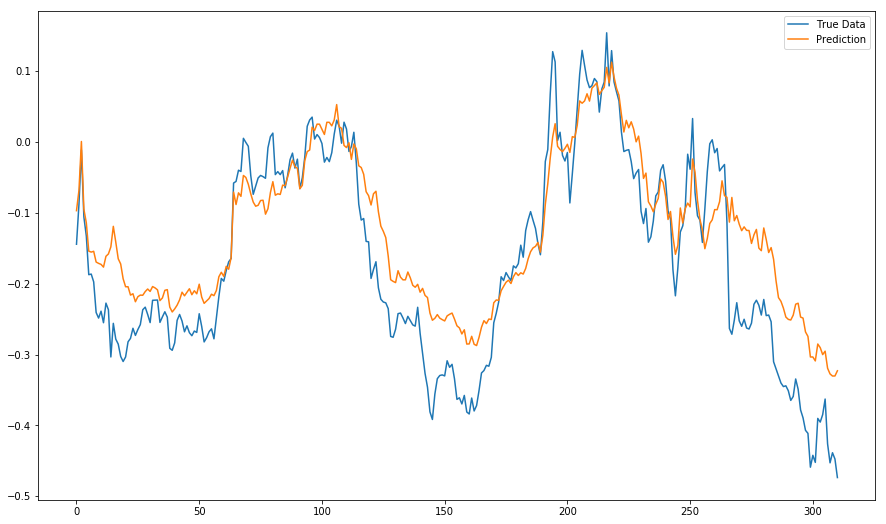

In [54]:
predicted = predict_point_by_point(model, X_test)
plot_results(predicted, y_test)

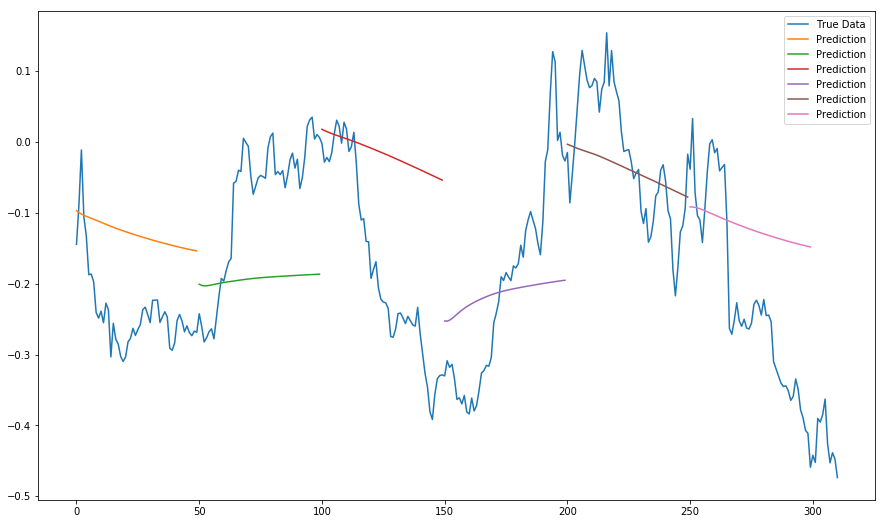

In [55]:
predictions = predict_sequences_multiple(model, X_test, seq_len, 50)
plot_results_multiple(predictions, y_test, 50)